In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('concrete_data.csv')
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
303,290.4,0.0,96.2,168.1,9.4,961.2,865.0,100,48.97
65,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
515,202.0,11.0,141.0,206.0,1.7,942.0,801.0,28,21.97
568,397.0,0.0,0.0,185.7,0.0,1040.6,734.3,7,25.45
468,213.5,0.0,174.2,159.2,11.7,1043.6,771.9,100,52.96


In [4]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :8], df.iloc[:,8], test_size=0.2, random_state=0 )

In [10]:
x = df.drop(columns=['Strength'])
y = df["Strength"]

In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2_score(y_pred, y_test)

0.4165205130958308

In [18]:
np.mean(cross_val_score(lr, x, y, scoring='r2'))

0.4609940491662866

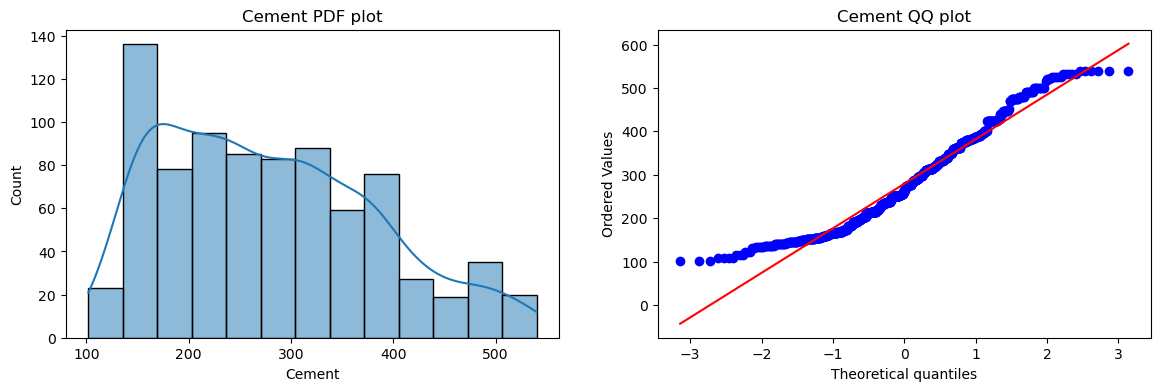

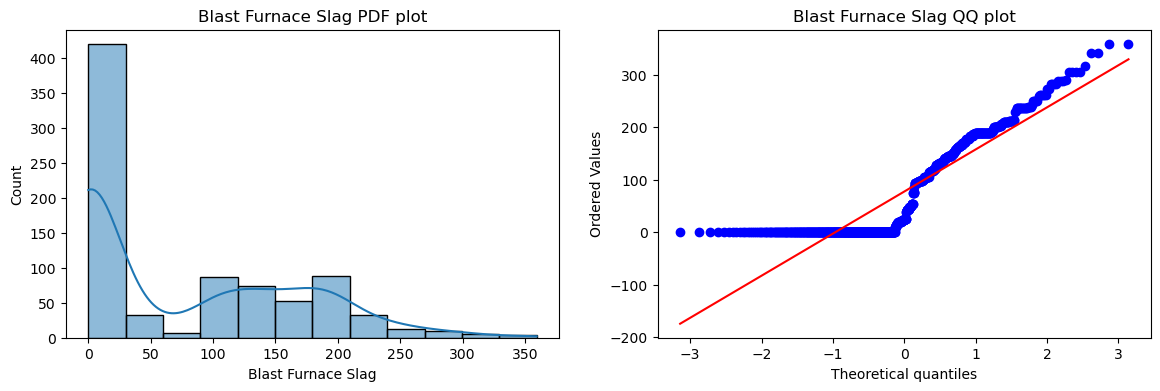

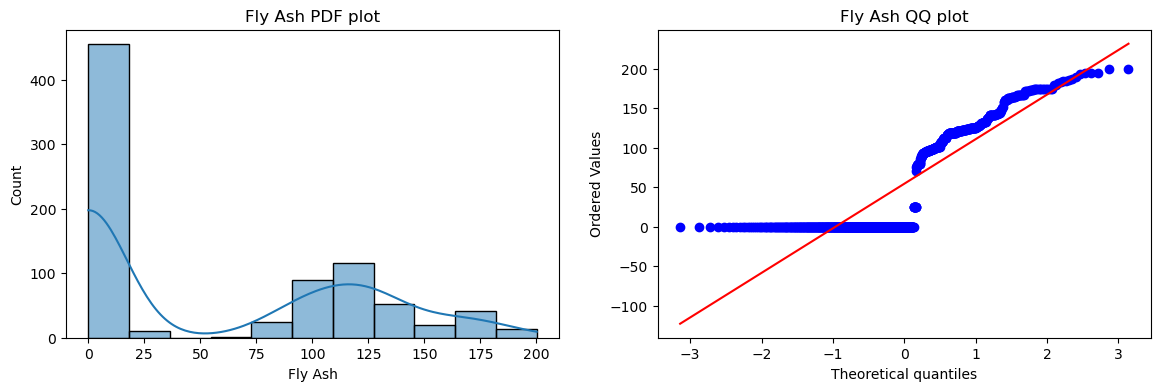

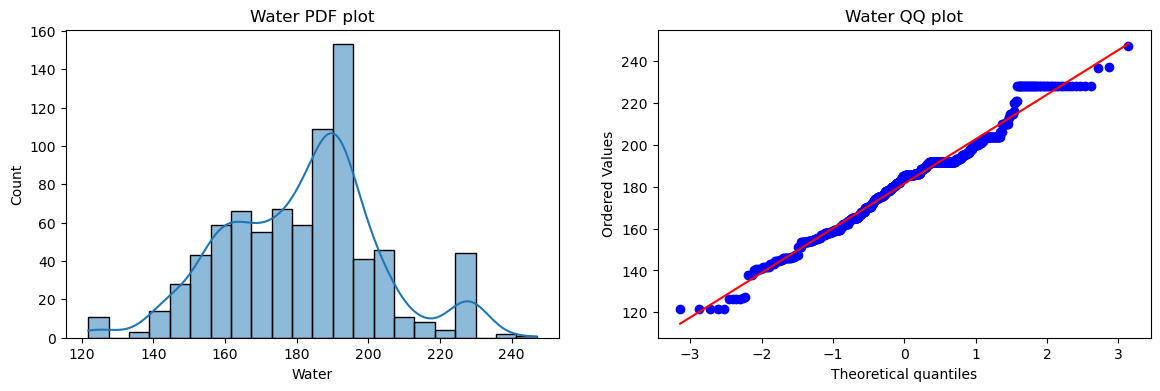

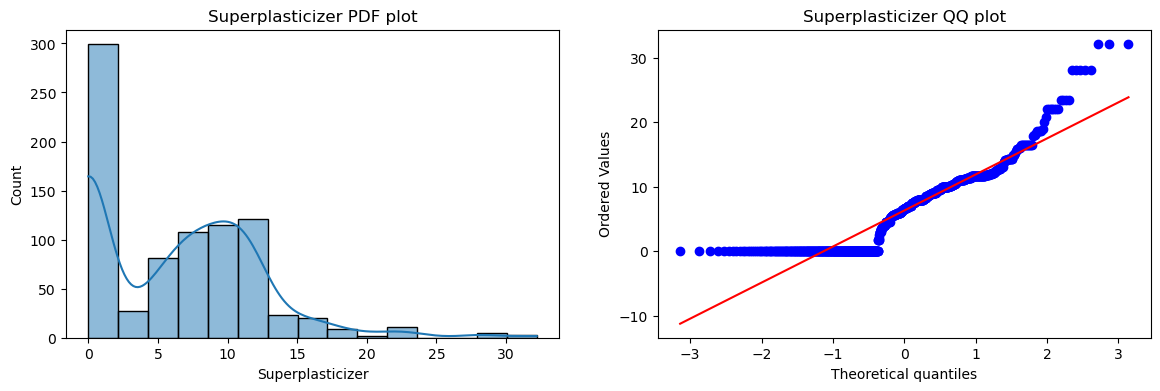

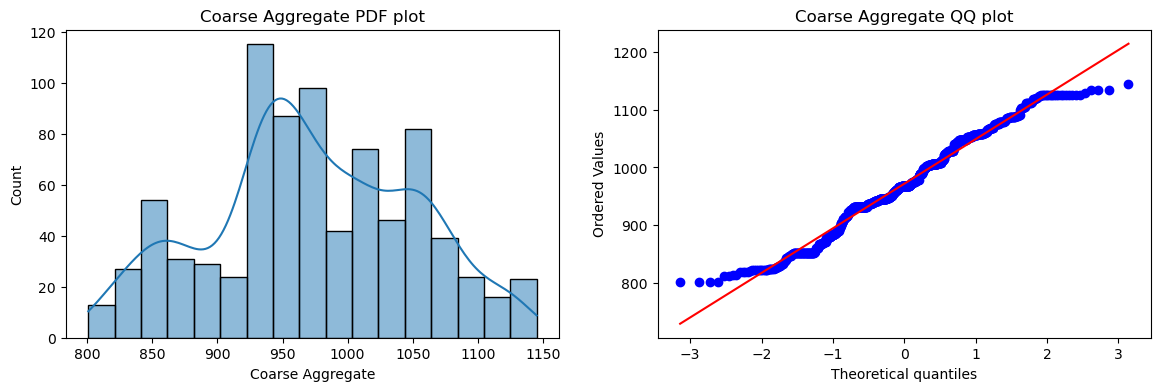

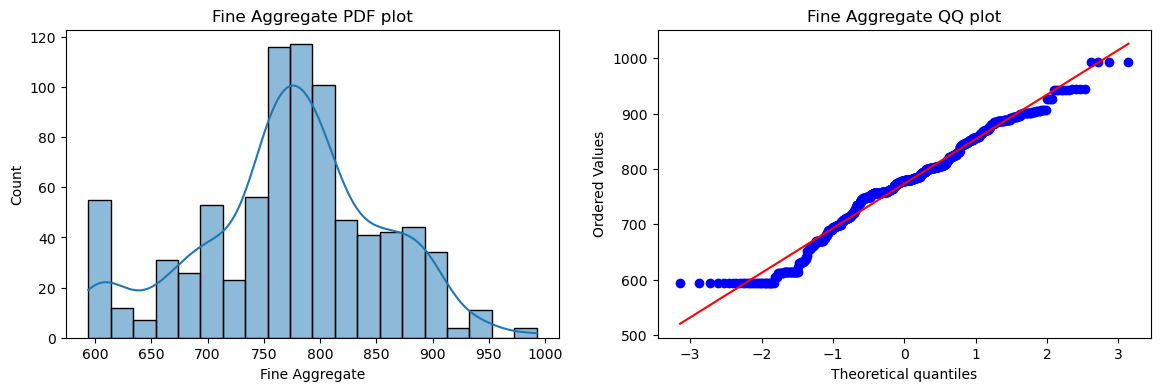

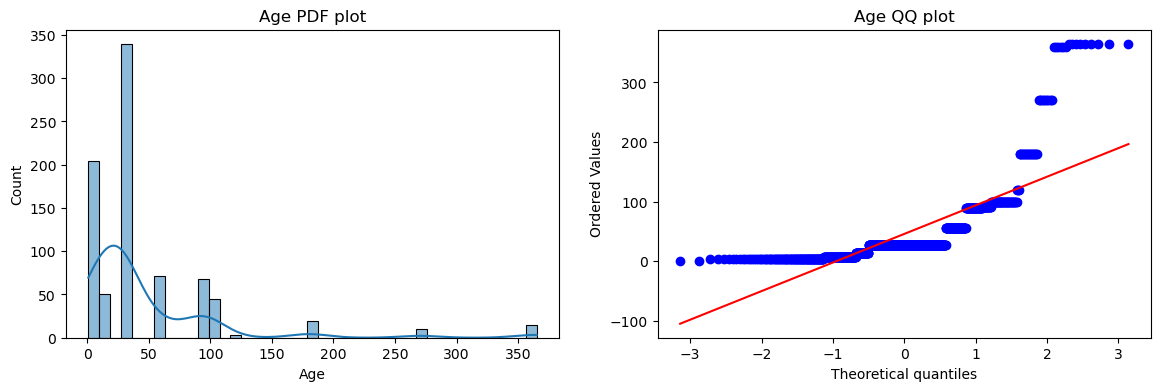

In [22]:
def plotter(x_train):
    for col in x_train.columns:
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
        sns.histplot(x_train[col], ax=ax1, kde=True)
        ax1.set_title(f'{col} PDF plot')
        stats.probplot(x_train[col], dist='norm', plot=plt)
        ax2.set_title(f'{col} QQ plot')
plotter(x_train)

In [30]:
pt1 = PowerTransformer(method='box-cox')
x_train_trf = pt1.fit_transform(x_train+0.00001)
x_test_trf = pt1.transform(x_test+0000.1)
lr.fit(x_train_trf, y_train)
y_pred_trf = lr.predict(x_test_trf)
r2_score(y_pred_trf, y_test)

0.7244072232389204

In [46]:
x_trs = pt1.fit_transform(x+0.00001)
lr.fit(x_trs, y)
cross_val_score(lr, x_trs, y, scoring='r2').mean()

0.6668489653763876

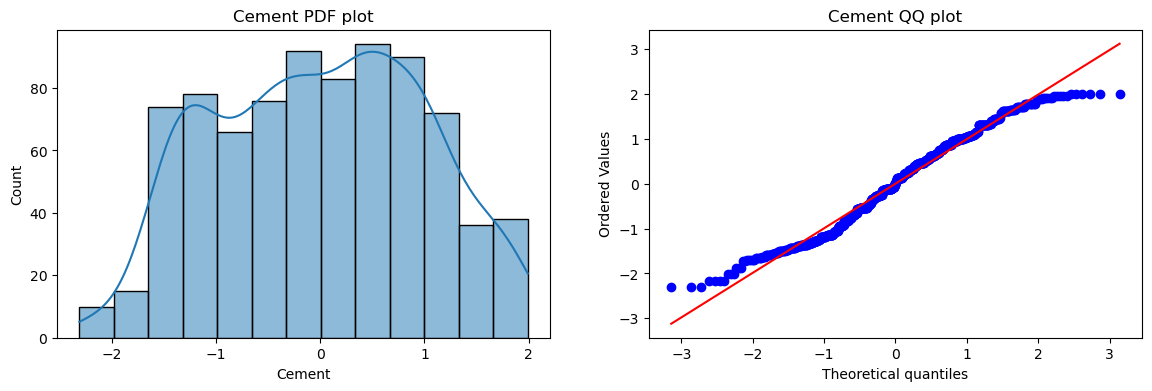

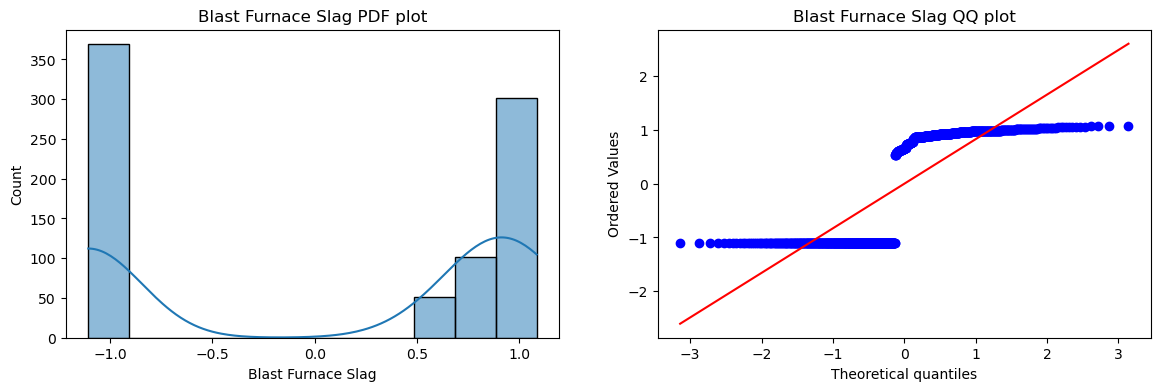

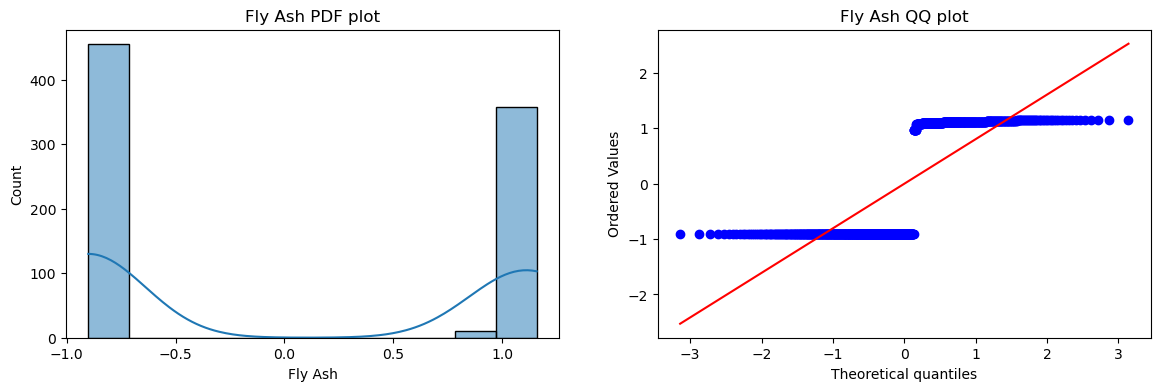

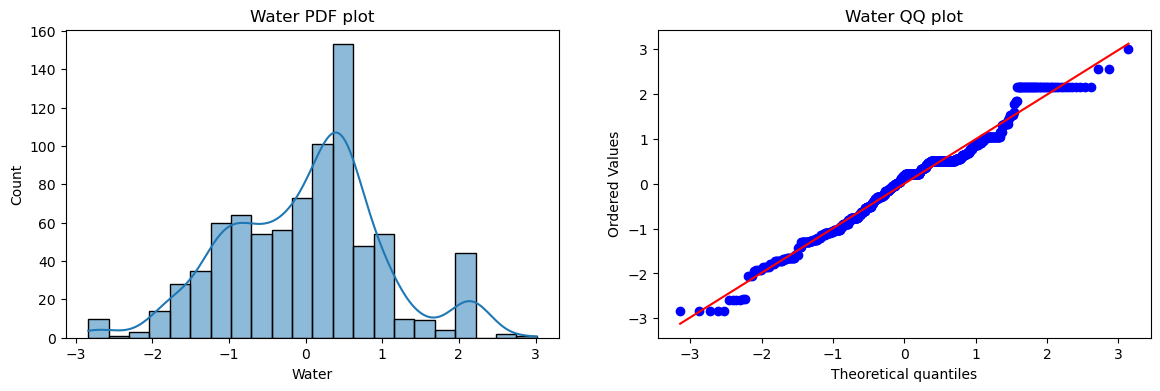

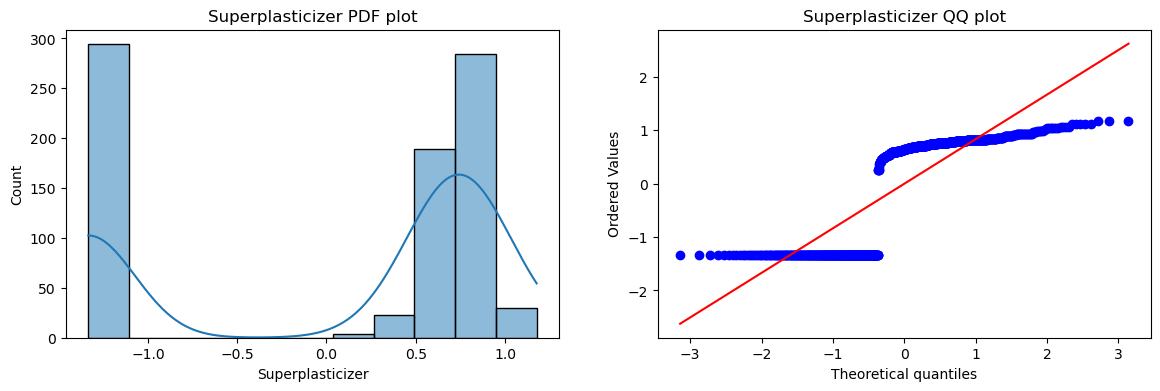

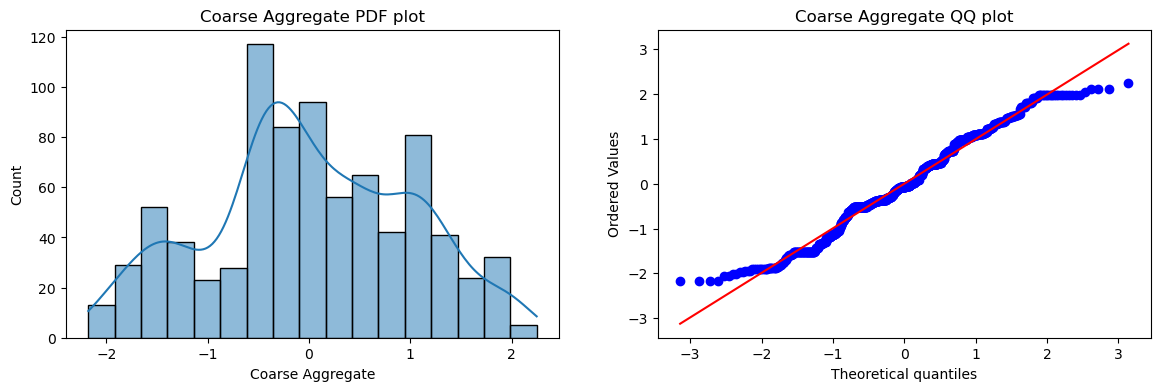

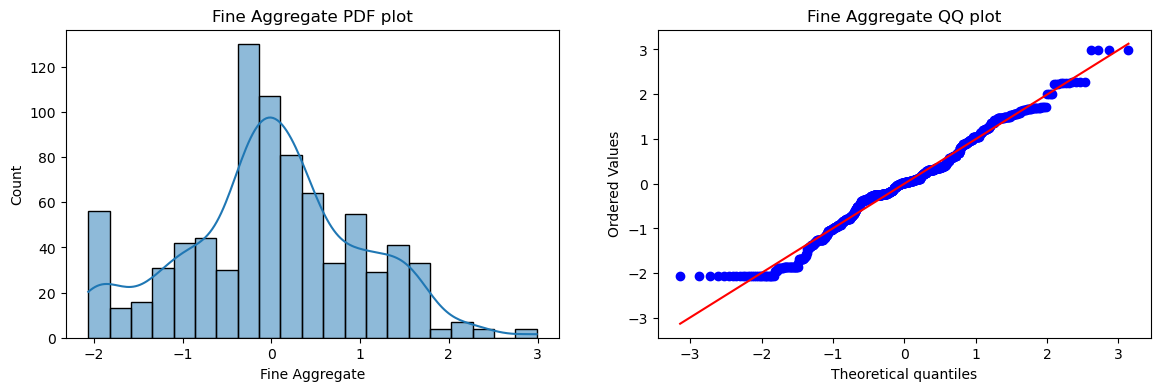

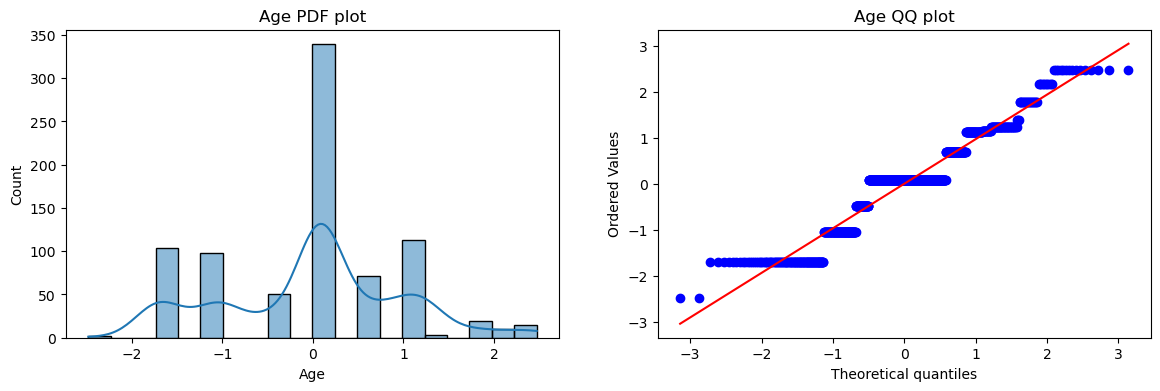

In [38]:
plotter(pd.DataFrame(x_train_trf, columns=x.columns))

In [42]:
pt2 = PowerTransformer()
x_train_trf2 = pt2.fit_transform(x_train)
x_test_trf2 = pt2.transform(x_test)
lr.fit(x_train_trf2, y_train)
y_pred_trf2 = lr.predict(x_test_trf2)
r2_score(y_pred_trf2, y_test)

0.807352672415303

In [ ]:
x_trs2 = pt2.fit_transform(x)
lr.fit(x_trs2, y)
cross_val_score(lr, x_trs2, y, me)